In [207]:
import requests
import pandas as pd

# URL base de la API
base_url = "https://www.banxico.org.mx/SieAPIRest/service/v1/series/"
# Identificadores de las series
id_series = "SF331450,SP30578"
token = "647341ac29892d3c3e533320e90d7b1d3fcc746ae57762877069ecd2216c3e49"
# Construye la URL completa
url = f"{base_url}{id_series}/datos"
# Parámetros de la solicitud
params = {
    'token': token
}
# Realiza la solicitud GET
response = requests.get(url, params=params)
# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    # Analiza la respuesta JSON
    data = response.json()
    series = data['bmx']['series']
    # Crear una lista para almacenar los datos
    series_data = []
    # Procesa los datos y los almacena en la lista
    for serie in series:
        serie_id = serie['idSerie']
        for dato in serie['datos']:
            series_data.append({
                "ID Serie": serie_id,
                "Fecha": dato['fecha'],
                "Dato": float(dato['dato'].replace(',', ''))  # Convertir dato a float]
            })
    # Crea un DataFrame a partir de la lista
    df = pd.DataFrame(series_data)
    # Muestra el DataFrame
    print(df)
else:
    print("Error en la solicitud:", response.status_code)


     ID Serie       Fecha   Dato
0     SP30578  01/01/1970   5.20
1     SP30578  01/02/1970   4.81
2     SP30578  01/03/1970   5.01
3     SP30578  01/04/1970   4.87
4     SP30578  01/05/1970   5.09
..        ...         ...    ...
868  SF331450  01/01/2024  11.26
869  SF331450  01/02/2024  11.25
870  SF331450  01/03/2024  11.21
871  SF331450  01/04/2024  11.01
872  SF331450  01/05/2024  11.01

[873 rows x 3 columns]


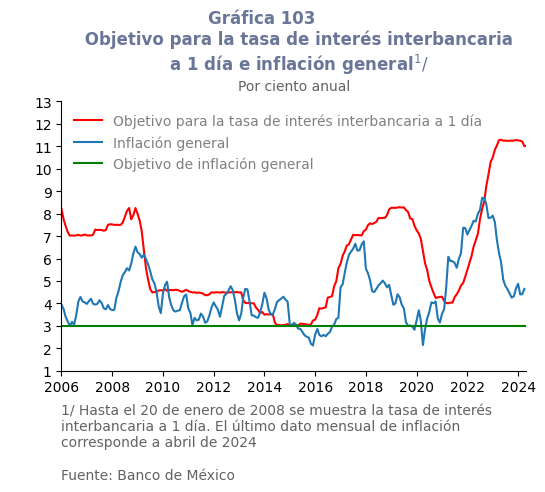

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna Fecha a datetime y filtrar los datos por año >= 2006
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df = df[df['Fecha'].dt.year >= 2006]

# Pivotear el DataFrame para tener las series en columnas separadas y establecer el objetivo de inflación
df_pivot = df.pivot(index='Fecha', columns='ID Serie', values='Dato')
df_pivot['Objetivo General de Inflación'] = 3

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6, 3.5))

# Graficar cada serie individualmente
ax.plot(df_pivot.index, df_pivot['SF331450'], label='Objetivo para la tasa de interés interbancaria a 1 día', color='red')
ax.plot(df_pivot.index, df_pivot['SP30578'], label='Inflación general')
ax.plot(df_pivot.index, df_pivot['Objetivo General de Inflación'], label='Objetivo de inflación general', color='green')

# Ajustar los límites del eje y
ax.set_ylim(1, 13)
ax.set_yticks(range(1, 14, 1))

# Ajustar los límites del eje x para que empiece en 2006
ax.set_xlim(pd.Timestamp('2006-01-01'), df_pivot.index.max())

# Eliminar los contornos superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Desactivar la cuadrícula
ax.grid(False)

# Añadir título
ax.set_title('Gráfica 103\n\
             Objetivo para la tasa de interés interbancaria\n\
             a 1 día e inflación general$^1/$\n', color='#2A3C6C', \
             fontweight='bold',alpha=0.7, ha= 'center'\
             , x=0.43, y=1.00 )

# Añadir leyenda
ax.legend(labelcolor='gray', frameon=False)
ax.text(0.5, 1.04, 'Por ciento anual', ha='center', color='#626264', transform=ax.transAxes)
ax.text(0.00, -0.12, '1/ Hasta el 20 de enero de 2008 se muestra la tasa de interés\n'
                    'interbancaria a 1 día. El último dato mensual de inflación\n'
                    'corresponde a abril de 2024\n'
                    '\nFuente: Banco de México',
        ha='left', va='top', color='#626264', transform=ax.transAxes)


# Mostrar la gráfica
plt.show()

In [187]:
import requests
import pandas as pd

# URL base de la API
base_url = "https://www.banxico.org.mx/SieAPIRest/service/v1/series/"
# Identificadores de las series
id_series = "SP30578,SP74662,SP74665"
token = "647341ac29892d3c3e533320e90d7b1d3fcc746ae57762877069ecd2216c3e49"
# Construye la URL completa
url = f"{base_url}{id_series}/datos"
# Parámetros de la solicitud
params = {
    'token': token
}
# Realiza la solicitud GET
response = requests.get(url, params=params)
# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    # Analiza la respuesta JSON
    data = response.json()
    series = data['bmx']['series']
    # Crear una lista para almacenar los datos
    series_data = []
    # Procesa los datos y los almacena en la lista
    for serie in series:
        serie_id = serie['idSerie']
        for dato in serie['datos']:
            series_data.append({
                "ID Serie": serie_id,
                "Fecha": dato['fecha'],
                "Dato": float(dato['dato'].replace(',', ''))  # Convertir dato a float]
            })
    # Crea un DataFrame a partir de la lista
    df = pd.DataFrame(series_data)
    # Muestra el DataFrame
    print(df)
else:
    print("Error en la solicitud:", response.status_code)

     ID Serie       Fecha  Dato
0     SP30578  01/01/1970  5.20
1     SP30578  01/02/1970  4.81
2     SP30578  01/03/1970  5.01
3     SP30578  01/04/1970  4.87
4     SP30578  01/05/1970  5.09
...       ...         ...   ...
1639  SP74662  01/12/2023  5.09
1640  SP74662  01/01/2024  4.76
1641  SP74662  01/02/2024  4.64
1642  SP74662  01/03/2024  4.55
1643  SP74662  01/04/2024  4.37

[1644 rows x 3 columns]


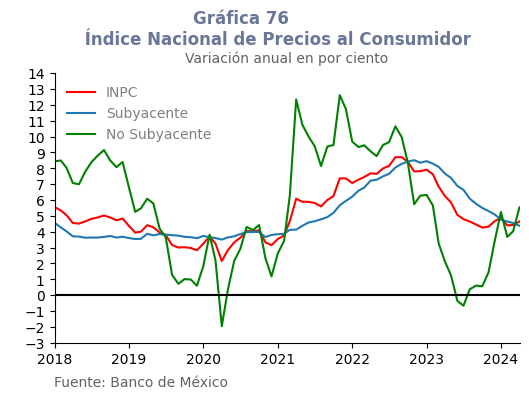

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna Fecha a datetime y filtrar los datos por año >= 2006
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df = df[df['Fecha'].dt.year >= 2018]

# Pivotear el DataFrame para tener las series en columnas separadas y establecer el objetivo de inflación
df_pivot = df.pivot(index='Fecha', columns='ID Serie', values='Dato')
df_pivot['cero'] = 0
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6, 3.5))

# Graficar cada serie individualmente
ax.plot(df_pivot.index, df_pivot['SP30578'], label='INPC', color='red')
ax.plot(df_pivot.index, df_pivot['SP74662'], label='Subyacente')
ax.plot(df_pivot.index, df_pivot['SP74665'], label='No Subyacente', color='green')
ax.plot(df_pivot.index, df_pivot['cero'], color='black')
# Ajustar los límites del eje y
ax.set_ylim(-3, 14)
ax.set_yticks(range(-3, 15, 1))

# Ajustar los límites del eje x para que empiece en 2006
ax.set_xlim(pd.Timestamp('2018-01-01'), df_pivot.index.max())

# Eliminar los contornos superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Desactivar la cuadrícula
ax.grid(False)
# Añadir título
ax.set_title('Gráfica 76\n\
             Índice Nacional de Precios al Consumidor\n'
             ,color='#2A3C6C', \
             fontweight='bold',alpha=0.7, ha= 'center'\
             , x=0.4, y=1.00)

# Añadir leyenda
ax.legend(labelcolor='gray', frameon=False)
ax.text(0.5, 1.04, 'Variación anual en por ciento', ha='center', color='#626264', transform=ax.transAxes)
ax.text(0.00, -0.12, 'Fuente: Banco de México',
        ha='left', va='top', color='#626264', transform=ax.transAxes)


# Mostrar la gráfica
plt.show()